# Задание по программированию: Выбор семейства распределений в наивном байесе

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек из обучающих выборок и посмотрите на признаки. С помощью sklearn.cross_validation.cross_val_score c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray, сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько полученные результаты согласуются с рекомендациями из лекций?

Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы можете продолжить исследование на других выборках (например, из UCI репозитория).

Для сдачи задания, ответьте на приведенные ниже вопросы.

Вопрос 1 - Каким получилось максимальное качество классификации на датасете breast_cancer?

Вопрос 2 - Каким получилось максимальное качество классификации на датасете digits?

Вопрос 3 - Выберите верные утверждения и запишите их номера через пробел (в порядке возрастания номера):

1) *NO* На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

2) *NO* На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

3) *YES* Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

4) *YES* На вещественных признаках лучше всего сработало нормальное распределение

In [1]:
from sklearn.datasets import load_digits, load_breast_cancer
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(answer))        

In [2]:
digits = load_digits()
cancer = load_breast_cancer()

X_dig = digits.data
y_dig = digits.target

X_can = cancer.data
y_can = cancer.target

In [3]:
for col in pd.DataFrame(X_dig).columns[:5]:
    pd.DataFrame(X_dig)[[col]].hist()

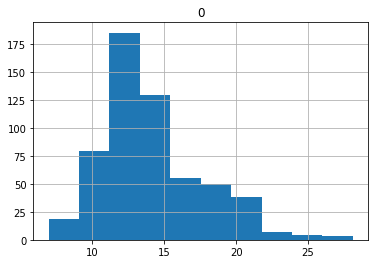

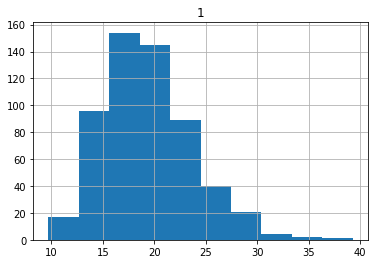

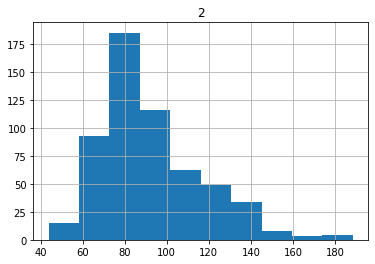

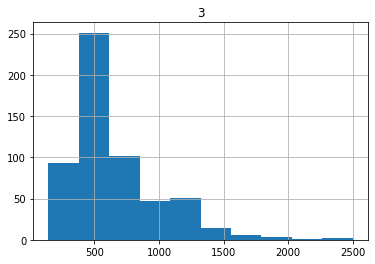

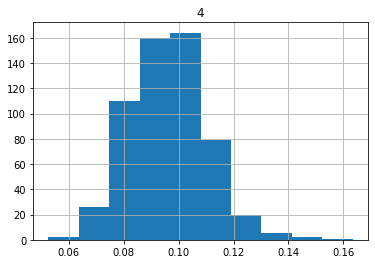

In [4]:
for col in pd.DataFrame(X_can).columns[:5]:
    pd.DataFrame(X_can)[[col]].hist()

In [5]:
print(cross_val_score(naive_bayes.BernoulliNB(), X_can, y_can, cv=3).mean())
print(cross_val_score(naive_bayes.MultinomialNB(), X_can, y_can, cv=3).mean())
print(cross_val_score(naive_bayes.GaussianNB(), X_can, y_can, cv=3).mean())

0.6274204028589994
0.8945790401930752
0.9367492806089297


In [6]:
print(cross_val_score(naive_bayes.BernoulliNB(), X_dig, y_dig, cv=3).mean())
print(cross_val_score(naive_bayes.MultinomialNB(), X_dig, y_dig, cv=3).mean())
print(cross_val_score(naive_bayes.GaussianNB(), X_dig, y_dig, cv=3).mean())

0.8258236507780582
0.8708771489735053
0.8186003803550138


In [7]:
answer1 = cross_val_score(naive_bayes.GaussianNB(), X_can, y_can, cv=3).mean()
answer2 = cross_val_score(naive_bayes.MultinomialNB(), X_dig, y_dig, cv=3).mean()
answer3 = '3 4'
write_answer_to_file(answer1, 'answers/2.8. Naive_bayes_answer1.txt')
write_answer_to_file(answer2, 'answers/2.8. Naive_bayes_answer2.txt')
write_answer_to_file(answer3, 'answers/2.8. Naive_bayes_answer3.txt')